<a href="https://colab.research.google.com/github/yshahen800/Big-Data-pyspark-project/blob/main/youssef_shahen_spark_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from pyspark.sql.functions import col, sum as _sum
import os
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import col, rand
from pyspark.sql import functions as F
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import time


In [2]:
df=pd.read_csv('/content/SalesKaggle3.csv')
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [3]:
df.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [5]:
df.isna().sum()

,0
Order,0
File_Type,0
SKU_number,0
SoldFlag,122921
SoldCount,122921
MarketingType,0
ReleaseNumber,0
New_Release_Flag,0
StrengthFactor,0
PriceReg,0


In [6]:
df['SoldFlag'].value_counts()

,count
SoldFlag,
0.0,63000
1.0,12996


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

,0
Order,0
File_Type,0
SKU_number,0
SoldFlag,0
SoldCount,0
MarketingType,0
ReleaseNumber,0
New_Release_Flag,0
StrengthFactor,0
PriceReg,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

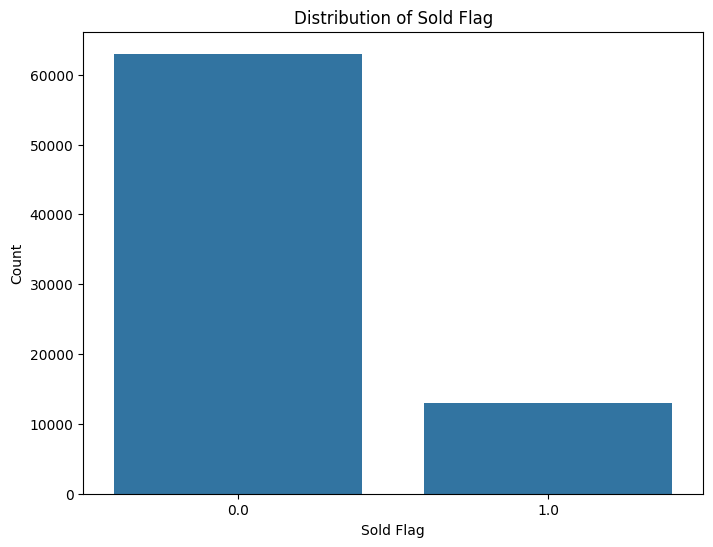

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='SoldFlag',)
plt.xlabel('Sold Flag')
plt.ylabel('Count')
plt.title('Distribution of Sold Flag')
plt.show()

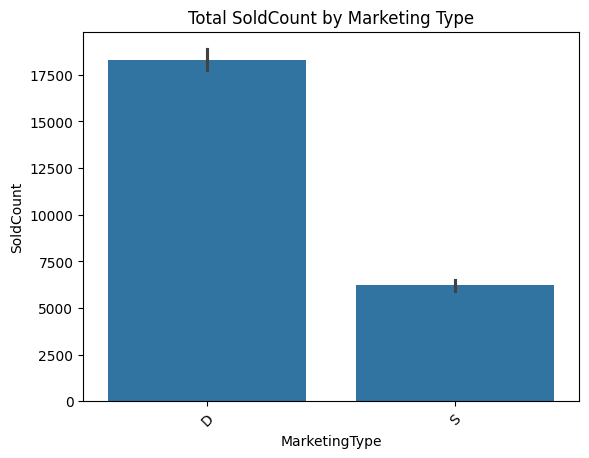

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='MarketingType', y='SoldCount', estimator='sum')
plt.title('Total SoldCount by Marketing Type')
plt.xticks(rotation=45)
plt.show()


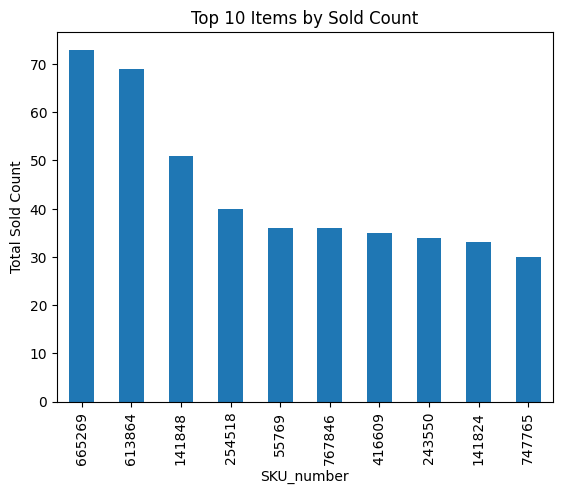

In [12]:
top_items = df.groupby('SKU_number')['SoldCount'].sum().nlargest(10)
top_items.plot(kind='bar', title='Top 10 Items by Sold Count')
plt.ylabel('Total Sold Count')
plt.show()


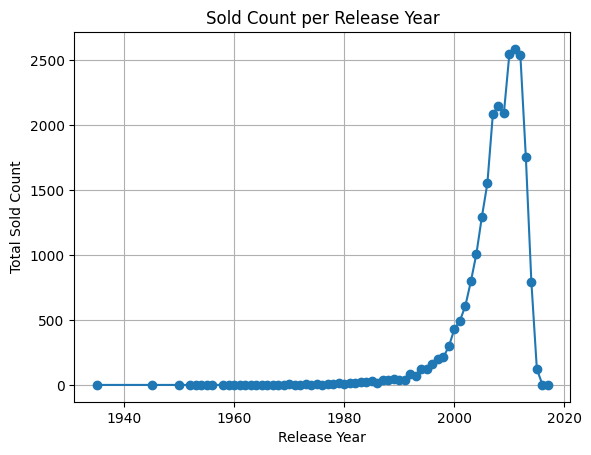

In [13]:
df.groupby('ReleaseYear')['SoldCount'].sum().plot(marker='o')
plt.title('Sold Count per Release Year')
plt.ylabel('Total Sold Count')
plt.xlabel('Release Year')
plt.grid(True)
plt.show()


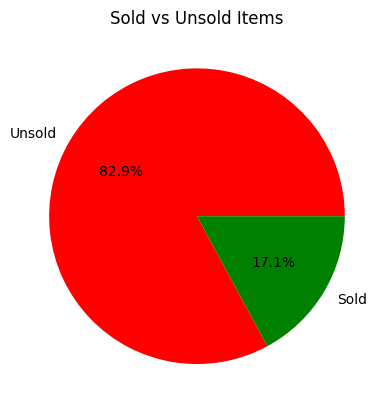

In [14]:
df['SoldFlag'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Unsold', 'Sold'], colors=['red', 'green'])
plt.title('Sold vs Unsold Items')
plt.ylabel('')
plt.show()


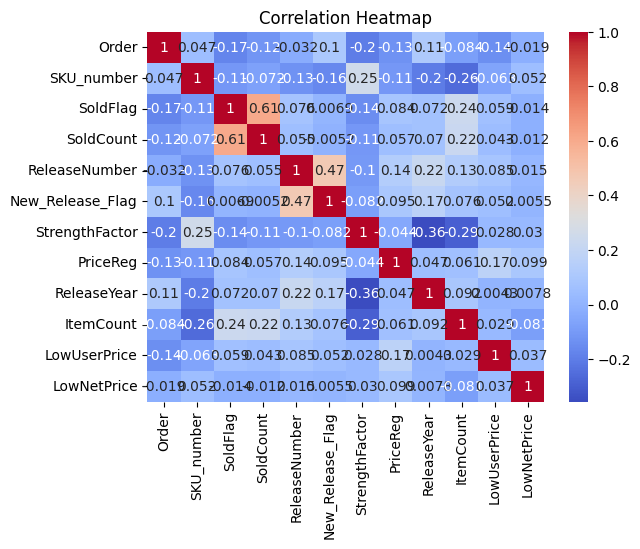

In [15]:
import seaborn as sns

numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


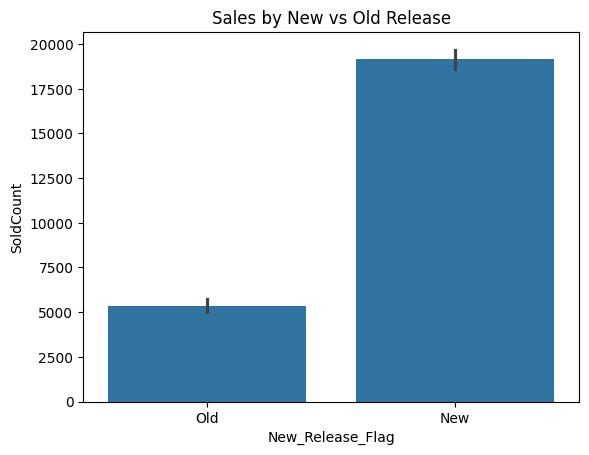

In [16]:
sns.barplot(data=df, x='New_Release_Flag', y='SoldCount', estimator='sum')
plt.title('Sales by New vs Old Release')
plt.xticks([0, 1], ['Old', 'New'])
plt.show()


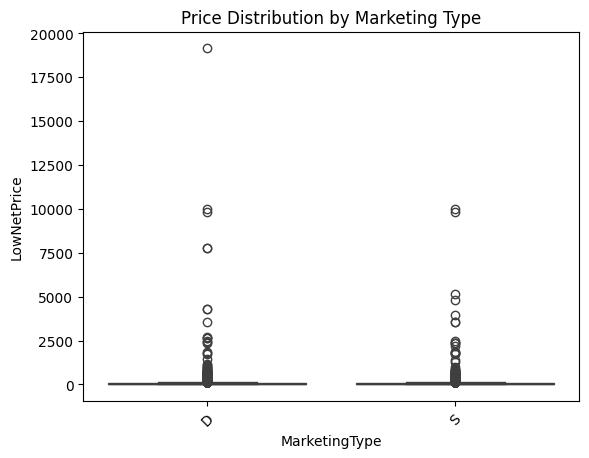

In [17]:
sns.boxplot(data=df, x='MarketingType', y='LowNetPrice')
plt.title('Price Distribution by Marketing Type')
plt.xticks(rotation=45)
plt.show()


In [18]:
df.nunique()

,0
Order,75996
File_Type,1
SKU_number,75996
SoldFlag,2
SoldCount,37
MarketingType,2
ReleaseNumber,66
New_Release_Flag,2
StrengthFactor,74603
PriceReg,9010


In [19]:
sold_rate = df['SoldFlag'].mean() * 100
print(f"Sold Conversion Rate: {sold_rate:.2f}%")

Sold Conversion Rate: 17.10%


In [20]:
df.groupby('New_Release_Flag')['SoldCount'].mean()

,SoldCount
New_Release_Flag,
0,0.334061
1,0.319164


In [21]:
df.groupby('MarketingType')['SoldCount'].agg(['mean', 'sum', 'count'])

,mean,sum,count
MarketingType,,,
D,0.520317,18273.0,35119
S,0.152188,6221.0,40877


In [22]:
df[['SoldCount', 'PriceReg', 'LowUserPrice', 'LowNetPrice']].corr()

,SoldCount,PriceReg,LowUserPrice,LowNetPrice
SoldCount,1.000000,0.056702,0.042608,-0.011965
PriceReg,0.056702,1.000000,0.171063,0.098846
LowUserPrice,0.042608,0.171063,1.000000,0.036565
LowNetPrice,-0.011965,0.098846,0.036565,1.000000


<Axes: ylabel='SoldCount'>

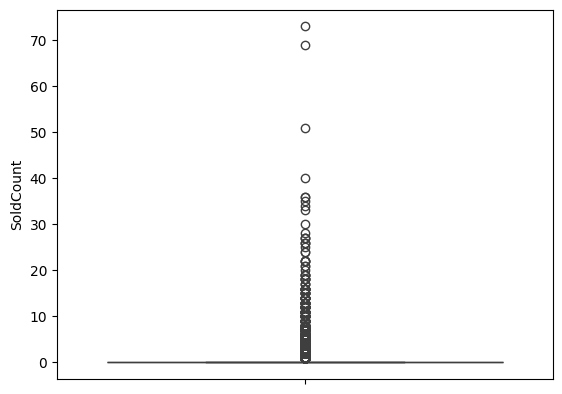

In [23]:
import seaborn as sns
sns.boxplot(data=df, y='SoldCount')

In [24]:
from scipy.stats import skew, kurtosis
print("Skewness:", df['SoldCount'].skew())
print("Kurtosis:", df['SoldCount'].kurtosis())

Skewness: 15.089792688633128
Kurtosis: 545.4338885086929


In [25]:
import statsmodels.api as sm
X = df['PriceReg']
y = df['SoldCount']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldCount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     245.1
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           3.67e-55
Time:                        11:43:42   Log-Likelihood:            -1.1955e+05
No. Observations:               75996   AIC:                         2.391e+05
Df Residuals:                   75994   BIC:                         2.391e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.007     35.230      0.0

In [26]:
df['Revenue'] = df['LowNetPrice'] * df['SoldCount']
print(df.groupby('MarketingType')['Revenue'].sum())

MarketingType
D    707895.84
S    309939.41
Name: Revenue, dtype: float64


File Size: 13595360 bytes
   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99         2015   
1              7                 1       1016014.0     24.81         2005   
2              0                 0        340464.0     46.00         2013   
3              4                 1        334011.0    100.00         2006   
4              2                 1       1287938.0    121.95         2010   

   ItemCount  LowUserPrice  LowNetPrice  
0          8         28.97        31.84  


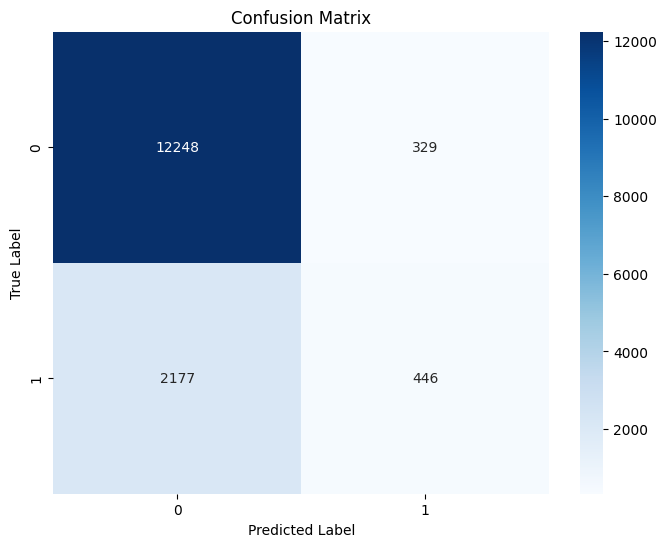

In [27]:
start_time = time.time()

def pre(df):
    df = df[df['File_Type'] == 'Historical']
    df = df.drop(columns=['Order', 'File_Type', 'SKU_number', 'SoldCount'])
    df = df.sample(frac=1, random_state=1).reset_index(drop=True)
    return df


file_path = "/content/SalesKaggle3.csv"
file_size = os.path.getsize(file_path)
print(f"File Size: {file_size} bytes")

df = pd.read_csv(file_path)
print(df.head())

df = pre(df)
df['SoldFlag'] = pd.to_numeric(df['SoldFlag'], errors='coerce')
df = df.dropna(subset=['SoldFlag'])


features = ['MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
            'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']
X = df[features]
y = df['SoldFlag']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['MarketingType'])
    ],
    remainder='passthrough'
)


clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=1))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)




cm = confusion_matrix(y_test, y_pred)


end_time = time.time()
runtime_sklearn = end_time - start_time
print(f" Scikit-learn Model Runtime: {runtime_sklearn:.2f} seconds")

metrics_sklearn = {
    "Model": "Scikit-learn",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='binary'),
    "Recall": recall_score(y_test, y_pred, average='binary'),
    "F1 Score": f1_score(y_test, y_pred, average='binary'),
    "Runtime (s)": runtime_sklearn
}


plt.figure(figsize=(8, 6))
print("Evaluation Metrics:")
print(f"Accuracy Score:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score: {precision_score(y_test, y_pred, average='binary'):.4f}")
print(f"Recall Score:    {recall_score(y_test, y_pred, average='binary'):.4f}")
print(f"F1 Score:        {f1_score(y_test, y_pred, average='binary'):.4f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


+-----+----------+----------+--------+---------+-------------+-------------+----------------+--------------+--------+-----------+---------+------------+-----------+
|Order| File_Type|SKU_number|SoldFlag|SoldCount|MarketingType|ReleaseNumber|New_Release_Flag|StrengthFactor|PriceReg|ReleaseYear|ItemCount|LowUserPrice|LowNetPrice|
+-----+----------+----------+--------+---------+-------------+-------------+----------------+--------------+--------+-----------+---------+------------+-----------+
|    2|Historical|   1737127|       0|        0|            D|           15|               1|      682743.0|   44.99|       2015|        8|       28.97|      31.84|
|    3|Historical|   3255963|       0|        0|            D|            7|               1|     1016014.0|   24.81|       2005|       39|         0.0|      15.54|
|    4|Historical|    612701|       0|        0|            D|            0|               0|      340464.0|    46.0|       2013|       34|       30.19|      27.97|
|    6|His

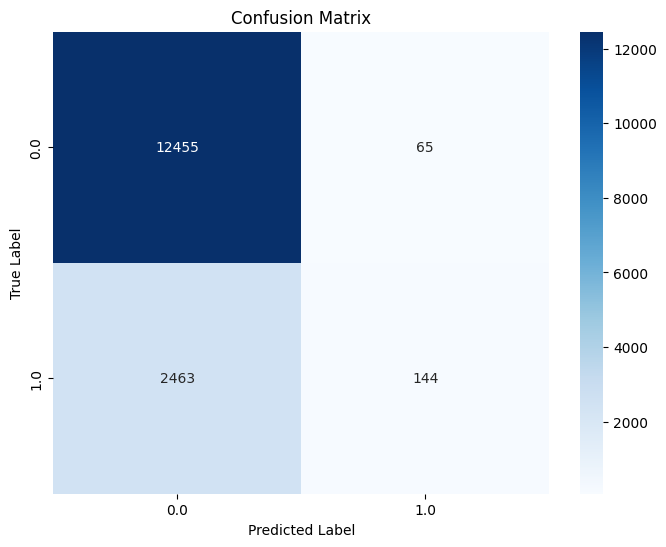

In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, rand
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

start_time = time.time()

def pre(df):
    df = df.filter(col('File_Type') == 'Historical')
    df = df.drop('Order', 'File_Type', 'SKU_number', 'SoldCount')
    df = df.withColumn("random", rand()).orderBy("random").drop("random")
    return df


def build_pip():
    indexer = StringIndexer(inputCol='MarketingType', outputCol='MarketingTypeIndex')
    encoder = OneHotEncoder(inputCol='MarketingTypeIndex', outputCol='MarketingTypeVec')
    assembler = VectorAssembler(
        inputCols=['MarketingTypeVec', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
                   'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
        outputCol='features'
    )
    classifier = RandomForestClassifier(labelCol='SoldFlag', featuresCol='features', seed=1)
    pipeline = Pipeline(stages=[indexer, encoder, assembler, classifier])
    return pipeline


spark = SparkSession.builder \
    .appName("SalesDataPipeline") \
    .getOrCreate()


file_path = "/content/SalesKaggle3.csv"
file_size = os.path.getsize(file_path)
df_csv = spark.read.csv(file_path, header=True, inferSchema=True)
df_csv.show()
print(f"File Size: {file_size} bytes")


df_preprocessed = pre(df_csv)
df_preprocessed = df_preprocessed.withColumn("SoldFlag", df_preprocessed["SoldFlag"].cast("double"))
df_preprocessed = df_preprocessed.dropna(subset=["SoldFlag"])
df_preprocessed.printSchema()
df_preprocessed.show()


pipeline = build_pip()
train_data, test_data = df_preprocessed.randomSplit([0.8, 0.2], seed=1)
model = pipeline.fit(train_data)
predictions = model.transform(test_data)
predictions.select('MarketingType', 'SoldFlag', 'prediction').show()


confusion_matrix = predictions.groupBy("SoldFlag", "prediction").count().orderBy("SoldFlag", "prediction")
confusion_matrix.show()


evaluator = MulticlassClassificationEvaluator(labelCol="SoldFlag", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(" Accuracy:", accuracy)

precision_evaluator = MulticlassClassificationEvaluator(labelCol="SoldFlag", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)
print(" Weighted Precision:", precision)

recall_evaluator = MulticlassClassificationEvaluator(labelCol="SoldFlag", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)
print("Weighted Recall:", recall)

f1_evaluator = MulticlassClassificationEvaluator(labelCol="SoldFlag", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(" F1 Score:", f1_score)

end_time = time.time()
runtime_pyspark = end_time - start_time
print(f" PySpark Model Runtime: {runtime_pyspark:.2f} seconds")

metrics_pyspark = {
    "Model": "PySpark",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score
}


confusion_matrix_pd = confusion_matrix.toPandas()
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_pd.pivot(index='SoldFlag', columns='prediction', values='count'), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


spark.stop()


In [29]:
comparison_df = pd.DataFrame([metrics_sklearn, metrics_pyspark])
comparison_df['Runtime (s)'] = [runtime_sklearn, runtime_pyspark]

print("\n Model Comparison with Runtime:")
print(comparison_df)




 Model Comparison with Runtime:
          Model  Accuracy  Precision    Recall  F1 Score  Runtime (s)
0  Scikit-learn  0.835132   0.575484  0.170034  0.262507    32.712724
1       PySpark  0.833719   0.804488  0.833399  0.770135    86.165528
